In [ ]:
#mount drive
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/data")
cwd = os.getcwd()
files = os.listdir(cwd)
print("Files in %r: %s" % (cwd, files))

Files in '/content/drive/MyDrive/Colab Notebooks/data': ['dataset.csv', 'Training Data.csv', 'tfidfSentimentModel.pkl', 'BISAYASenti.Model', 'dolera dataset.csv', 'dolera.csv']


**Import dataset**

In [ ]:
import pandas as pd
#Loading the dataset collected.  
#This dataset contains class labels: positive, negative, neutral
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/dolera.csv",encoding='UTF-8')

**Data Transformation**

In [ ]:
data.isnull().sum()
data=data.dropna()

In [ ]:
data.shape

(441, 2)

**Dataset Basic Stats**

In [ ]:
#data.shape
print(len(data.NEWS))
data['CLASS'].value_counts()

441


POSITIVE    257
NEGATIVE    184
Name: CLASS, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train = train_test_split(data.NEWS)

In [ ]:
#This code is for exploration purpose: we want to see the Words and their respective counts
#the code is somehow similar to the bag of words representations
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer() 
counts = vectorizer.fit_transform(data.NEWS)
#unigrams=pd.DataFrame(counts.sum(axis=0),columns=counts.get_feature_names()).T.sort_values(0,ascending=False).head(30)
#unigrams
#words = vectorizer.vocabulary_
#words = vectorizer.get_feature_names()
#t.columns=['count']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
co=CountVectorizer() #Bag of Words
counts = co.fit_transform(data.NEWS)
t=pd.DataFrame (counts.sum(axis=0), columns=co.get_feature_names_out()).T.sort_values (0, ascending=False).head (10)
t.columns=['count']

In [ ]:
t

,count
sa,1003
ang,448
nga,448
mga,319
ug,179
og,121
na,108
ka,99
ilang,69
pa,67


In [ ]:
co = CountVectorizer(ngram_range=(2,2))
counts = co.fit_transform(data.NEWS)
wordFrequency = pd.DataFrame(counts.sum(axis=0), columns=co.get_feature_names()).T.sort_values (0, ascending=False).head(10)
wordFrequency.columns = ['Frequency']
wordFrequency

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Frequency
sa mga,135
ang mga,57
sa ilang,40
sa maong,26
gikan sa,23
tungod sa,20
usa ka,20
na sa,20
sa atong,19
ang ilang,19


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(data.NEWS)

#words = vectorizer.vocabulary_

words = vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
words

['00',
 '000',
 '07',
 '080',
 '10',
 '100',
 '105',
 '10883',
 '11',
 '113',
 '12',
 '15',
 '15407',
 '16',
 '177',
 '18',
 '186',
 '19',
 '1990',
 '1992',
 '1st',
 '20',
 '200',
 '2012',
 '2013',
 '2016',
 '2019',
 '2021',
 '2022',
 '21',
 '243',
 '25',
 '250pcs',
 '27',
 '277',
 '29',
 '2nd',
 '30',
 '300',
 '303rd',
 '320',
 '37',
 '39',
 '3m',
 '40',
 '44',
 '48',
 '50',
 '500',
 '51',
 '54',
 '63',
 '64',
 '70',
 '71',
 '733',
 '7434',
 '750',
 '76',
 '812',
 '83',
 '834',
 '89',
 '91',
 '98',
 'a2',
 'a4',
 'abante',
 'abellanosa',
 'abilidad',
 'abli',
 'abogado',
 'abort',
 'abortionist',
 'abril',
 'acceptance',
 'acid',
 'act',
 'active',
 'addict',
 'adlaw',
 'adlawa',
 'administrator',
 'adto',
 'adtoan',
 'aduna',
 'adunay',
 'affairs',
 'affirmed',
 'again',
 'agency',
 'agianan',
 'agni',
 'ago',
 'agosto',
 'agriculture',
 'aguada',
 'agusan',
 'ahensiya',
 'ahensya',
 'aids',
 'ako',
 'akong',
 'aksidente',
 'aksidenteng',
 'aktibidad',
 'aktibo',
 'akusasyon',
 'alan

**Data Preprocessing/Cleaning**

In [ ]:
#data=data.isnull().sum() # To determine whether there are any missing values in our dataframe
#data=data.dropna() # drop empty rows, impute null values
#data.dtype
#converting POLARITY column into numeric target 
#1. ==========
#data.loc[data['POLARITY']=='POSITIVE','POLARITY']=1
#data.loc[data['POLARITY']=='NEGATIVE','POLARITY']=0
#data.head()

#2. ======================================
data['CLASS']=data.CLASS.map({'POSITIVE':1,'NEGATIVE':0})
data.head(10)

,NEWS,CLASS
0,"Adlaw na karon sa paghukom, human sa pila ka b...",1
1,"Kagahapong adlawa, daghan pang mga kataposang ...",0
2,Daghang mga alegasyong nanggawas nga vote buyi...,0
3,Matud pa nga dunay mga pasekretong mga pagpang...,0
4,"Naa ra man diay ning mga kwartaha, nganong wal...",0
5,Makauuwaw dili ba?,0
6,Pabagaay og nawong ang mga kandidato.,0
7,Human sa ilang pagpanghambog bahin sa ilang mg...,0
8,Bisan sa ilang pangangkong abilidad ug katakos...,0
9,Makadismaya para sa ubang botante nga nituo sa...,0


In [ ]:
#LOWERCASE
import string
def convert_tolowercase(NEWS):
    new_word = (map(lambda x: x.lower(), data.NEWS))
    new_words = list(new_word)
    return new_words

In [ ]:
convert_tolowercase(data)

['adlaw na karon sa paghukom, human sa pila ka bulang pagkabahin-bahin sa mga pilipino, paghimbis ug pagkilatis sa matag kandidato (para sa ubang nanigurado kinsay pilion) hukman na sila karon pinaagi sa balota.',
 'kagahapong adlawa, daghan pang mga kataposang hunat nga gihimo ang nagkadaiyang kandidato pagkombinsir sa mga botante.',
 'daghang mga alegasyong nanggawas nga vote buying sa nagkalain-laing mga lugar.',
 'matud pa nga dunay mga pasekretong mga pagpangtunol og mga sobre uban sa sample ballots ug gi-staple nga kwarta, gikan sa kinagamyan nga p20 hangtud p3,500 matag botante.',
 'naa ra man diay ning mga kwartaha, nganong wala man ni nila gitabang sa mga tawo panahon sa pandemiya o ba kaha sa odette?',
 'makauuwaw dili ba?',
 'pabagaay og nawong ang mga kandidato.',
 'human sa ilang pagpanghambog bahin sa ilang mga nahimo na ug sa mga platapormang kaya nilang buhaton kun silay padag-on, mosangpot ra gihapon diay sa sila sa pagpamalit og botos.',
 'bisan sa ilang pangangkong a

In [ ]:
import re
def remove_punctuation(NEWS):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in data.NEWS:
        new_word = re.sub('[%s]'%re.escape(string.punctuation),'', word)
        #if new_word != '':
        new_words.append(new_word)
    return new_words

In [ ]:
remove_punctuation(data)

['Adlaw na karon sa paghukom human sa pila ka bulang pagkabahinbahin sa mga Pilipino paghimbis ug pagkilatis sa matag kandidato para sa ubang nanigurado kinsay pilion hukman na sila karon pinaagi sa balota',
 'Kagahapong adlawa daghan pang mga kataposang hunat nga gihimo ang nagkadaiyang kandidato pagkombinsir sa mga botante',
 'Daghang mga alegasyong nanggawas nga vote buying sa nagkalainlaing mga lugar',
 'Matud pa nga dunay mga pasekretong mga pagpangtunol og mga sobre uban sa sample ballots ug gistaple nga kwarta gikan sa kinagamyan nga P20 hangtud P3500 matag botante',
 'Naa ra man diay ning mga kwartaha nganong wala man ni nila gitabang sa mga tawo panahon sa pandemiya o ba kaha sa Odette',
 'Makauuwaw dili ba',
 'Pabagaay og nawong ang mga kandidato',
 'Human sa ilang pagpanghambog bahin sa ilang mga nahimo na ug sa mga platapormang kaya nilang buhaton kun silay padagon mosangpot ra gihapon diay sa sila sa pagpamalit og botos',
 'Bisan sa ilang pangangkong abilidad ug katakos it

In [ ]:
import string
import unicodedata
def remove_non_ascii(NEWS):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in data.NEWS:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [ ]:
remove_non_ascii(data)

['Adlaw na karon sa paghukom, human sa pila ka bulang pagkabahin-bahin sa mga Pilipino, paghimbis ug pagkilatis sa matag kandidato (para sa ubang nanigurado kinsay pilion) hukman na sila karon pinaagi sa balota.',
 'Kagahapong adlawa, daghan pang mga kataposang hunat nga gihimo ang nagkadaiyang kandidato pagkombinsir sa mga botante.',
 'Daghang mga alegasyong nanggawas nga vote buying sa nagkalain-laing mga lugar.',
 'Matud pa nga dunay mga pasekretong mga pagpangtunol og mga sobre uban sa sample ballots ug gi-staple nga kwarta, gikan sa kinagamyan nga P20 hangtud P3,500 matag botante.',
 'Naa ra man diay ning mga kwartaha, nganong wala man ni nila gitabang sa mga tawo panahon sa pandemiya o ba kaha sa Odette?',
 'Makauuwaw dili ba?',
 'Pabagaay og nawong ang mga kandidato.',
 'Human sa ilang pagpanghambog bahin sa ilang mga nahimo na ug sa mga platapormang kaya nilang buhaton kun silay padag-on, mosangpot ra gihapon diay sa sila sa pagpamalit og botos.',
 'Bisan sa ilang pangangkong a

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer().fit(data.NEWS)
count_tokens = vectorizer.get_feature_names()
doc_to_matrix = vectorizer.transform(data.NEWS)

df_count_vector = pd.DataFrame(data=doc_to_matrix.toarray(),columns=count_tokens)
df_count_vector

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,07,080,10,100,105,10883,11,113,...,year,years,yolanda,you,yuta,zamora,zarsozo,œbongbongâ,œdaog,œsquare
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#from numpy import vectorize
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

#CountVectorizer converts a collection of documents to an array of token counts.
vectorizer = CountVectorizer()
tf = vectorizer.fit_transform(data.NEWS)

pd.DataFrame(data=tf.toarray(),columns=vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,07,080,10,100,105,10883,11,113,...,year,years,yolanda,you,yuta,zamora,zarsozo,œbongbongâ,œdaog,œsquare
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word', norm=None, use_idf=True, smooth_idf=True)
tfidfMatrix = vectorizer.fit_transform(data.NEWS)

doc_term_matrix = pd.DataFrame(data = tfidfMatrix.toarray(),columns=vectorizer.get_feature_names())
doc_term_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,07,080,10,100,105,10883,11,113,...,year,years,yolanda,you,yuta,zamora,zarsozo,œbongbongâ,œdaog,œsquare
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import re 
corpus=[]
for i in range(0,len(data.NEWS)):
    title = re.sub('[^a-zA]-Z',' ',data.NEWS[i]) #remove all special symbols and numbers
    title = title.lower()
    #title=tittle.split()
    corpus.append(title)

    #print(corpus)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer().fit(corpus) #vectorizer = CountVectorizer(binary=True).fit(corpus)
count_tokens = vectorizer.get_feature_names()
doc_to_matrix = vectorizer.transform(corpus)

df_count_vector = pd.DataFrame(data=doc_to_matrix.toarray(),columns=count_tokens)
df_count_vector

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,07,080,10,100,105,10883,11,113,...,year,years,yolanda,you,yuta,zamora,zarsozo,œbongbongâ,œdaog,œsquare
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import string
import re 

def preprocessing(text):
    clean_message = []
    for sentence in text: #range(0,len(text)):
        #remove punctuations
        sentence=sentence.translate(str.maketrans('','',string.punctuation))
        #remove digits
        new_word=re.sub(r"\d+", "",sentence)
        clean_message.append(new_word)

    return clean_message

text=preprocessing(data.NEWS)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer =  TfidfVectorizer(analyzer='word', norm=None,use_idf=True,smooth_idf=True)
tfidfMatrix = vectorizer.fit_transform(text)

doc_term_matrix = pd.DataFrame(data=tfidfMatrix.toarray(),columns=vectorizer.get_feature_names())
doc_term_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abellanosa,abilidad,abogado,abort,abortionist,abril,acceptance,acid,act,active,...,year,years,yolanda,you,yuta,zamora,zarsozo,œbongbongâ,œdaog,œsquare
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import string
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')


def createVocabulary(documentList):
    vocab=dict()
    for sent in documentList:
        words= word_tokenize(sent.lower())
        for word in words:
            if(word in vocab.keys()):
                vocab[word] = vocab[word] + 1
            else:
                vocab[word] = 1
    return vocab

vocab = createVocabulary(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import numpy as np

termDict={}

documentTFMatrix = np.zeros((len(text),len(vocab)))

docTermDataFrame = pd.DataFrame(documentTFMatrix, columns=sorted(vocab.keys()))
docCount = 0
for sentence in text:
    words = word_tokenize(sentence.lower())
    for word in words:
        if(word in vocab.keys()):
            docTermDataFrame[word][docCount] = docTermDataFrame[word][docCount] +1

    docCount = docCount +1

docTermDataFrame

,a,abellanosa,abilidad,abogado,abort,abortionist,abril,acceptance,acid,act,...,you,yuta,zamora,zarsozo,â€œbongbongâ€,â€œdaog,â€œsquare,â€˜early,–,’
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Calculate TF-IDF

docsIdfMat=np.zeros((len(vocab),len(text)))
idfDict={}

for column in docTermDataFrame.columns:
    idfDict[column]= np.log((len(text) +1 )/(1+ (docTermDataFrame[column] != 0).sum()))+1

#compute tf.idf matrix
docsTfIdfMatrix=np.zeros ((len(text),len(vocab)))
docTfIdfDataFrame=pd.DataFrame(docsTfIdfMatrix ,columns=sorted (vocab.keys()))

docCount=0
for sentence in text:
    for key in idfDict.keys():
        docTfIdfDataFrame[key][docCount]=docTermDataFrame[key][docCount]*idfDict[key]

    docCount=docCount +1

docTfIdfDataFrame

,a,abellanosa,abilidad,abogado,abort,abortionist,abril,acceptance,acid,act,...,yuta,zamora,zarsozo,zero,â€,â€˜ahongâ€™,ã¢â‚¬å,ã¢â‚¬ëœearly,“,”
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def remove_singleCharString(words):
    new_words = []  
    for word in words:
        new_word=re.sub(r"(^| ).(( ).)*( |$)",' ',word) 
        if new_word !='':
            new_words.append(new_word)
    return new_words

In [ ]:
remove_singleCharString(data)

['NEWS', 'CLASS']

In [ ]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
def remove_stopwords(text):
    stpwrd = nltk.corpus.stopwords.words('english')
    s_new = []
    new_stopwords = ["ang", "ug", "og", 'na','ni',"nga",
                 'iyang','ila','imo',
                 'ka','kay','kini','kining','ko','kon','kung',
                 "mga",
                 'niini',
                 'pa',
                 'ra',
                 'sa','sab','sila','siya',
                'usab']
    
   
    stpwrd.extend(new_stopwords)
    for sent in text:
        s=sent.split()
        string=''
        token_result=[]
        for word in s:#word_tokenize(sent):       
            if not word in stpwrd:
                string +=' ' + word
                string1=''.join(string)
                #token_result.append(w)
        s_new.append(string1)    
    return s_new       

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
remove_stopwords(data.NEWS)

[' Adlaw karon paghukom, human pila bulang pagkabahin-bahin Pilipino, paghimbis pagkilatis matag kandidato (para ubang nanigurado kinsay pilion) hukman karon pinaagi balota.',
 ' Kagahapong adlawa, daghan pang kataposang hunat gihimo nagkadaiyang kandidato pagkombinsir botante.',
 ' Daghang alegasyong nanggawas vote buying nagkalain-laing lugar.',
 ' Matud dunay pasekretong pagpangtunol sobre uban sample ballots gi-staple kwarta, gikan kinagamyan P20 hangtud P3,500 matag botante.',
 ' Naa man diay ning kwartaha, nganong wala man nila gitabang tawo panahon pandemiya ba kaha Odette?',
 ' Makauuwaw dili ba?',
 ' Pabagaay nawong kandidato.',
 ' Human ilang pagpanghambog bahin ilang nahimo platapormang kaya nilang buhaton kun silay padag-on, mosangpot gihapon diay pagpamalit botos.',
 ' Bisan ilang pangangkong abilidad katakos itandi kaatbang, kwarta lang gihapon diay ilang saligan aron makadaog.',
 ' Makadismaya para ubang botante nituo ilang gipangestorya kampanya.',
 ' Asa man kaha nila 

In [ ]:
contractions={ 
   "adunay":"aduna may",
   "agi'g":"agi ug", "agi'g":"agi ug",
    "angay'ng":"angay nga",
    "asa'y":"asa may",
    "ato'ng":"ato nga",
    "atoang":"atoa nga",
    "aduna'y":"aduna may","adunaha'ng":"adunahan nga",
    "ako'y":"ako may","apektado'ng":"apektado nga","adlaw'ng":"adlaw nga",
    "bahala'g":"bahala ug","ba'y":"ba diay","bali'g":"bali ug",
    "bisa'g":"bisan ug",
    "diay'g":"diay ug","dako'ng":"dako nga","duna'y":"duna may","dayo'g":"dayon ug",
    "dako'ng":"dako nga",
    "du't":"duot",
    "gagmay'ng":"gagmay nga","ginagmay'ng":"ginagmay nga",
    "gamay'ng":"gamay nga","gamayng":"gamay nga",
    "gyu'y":"gyud may","gayu'y":"gyud may","gyuy":"gayud may","g'yuy":"gyud may",
    "g'yud":"gayud", # 
    "iro'ng":"iro nga","kanato'ng":"kanato nga","inadlaw'ng":"inadlaw nga",
    "gihimong":"gihimo nga", "nahimong":"nahimo nga","nakahimong":"nakahimo nga",
    "iyang":"iya nga",
    "kini'g":"kini ug",
    "kita'g":"kita ug",
    "la'g":"lang ug","langyaw'ng":"langyaw nga","hinuo'y":"hinuon may","mo'g":"mo ug",
    "maghimo'g":"maghimo ug",  
    "mangita'g":"mangita ug",
    "mura'g":"mura ug","magkunsumo'g":"magkunsumo ug","makapaagni'g":"makapaagni ug",
    "mangita'g":"mangita ug",
    "mipasaka'g":"mipasaka ug",
    "pagpangita'g":"pagpangita ug",
    "mi'g":"kami ug","mo'y":"mo may","mao'y":"mao may","magmaneho'g":"magmaneho ug",
    "magsigeg":"magsige ug",
    "milabay'ng":"milabay'ng","maayo'ng":"maayo nga","inantigo'ng":"inantigo nga",
    "nahibu'ng":"nahibulong",
    "nahuptan'g":"nahuptan nga",
    "madutla'g":"madutlan ug",
    "mura'g":"mura ug",
    "nakalabay'ng":"nakalabay nga",
    "nila'g":"nila ug",
    "naghimo'g":"naghimo ug","nahimong":"nahimo nga","naninda'g":"naninda ug",
    "nganong":"ngano nga","nagbato'g":"nagbaton ug","kahimoa'g":"kahimoan ug",
    "kagagmayg":"kagagmay ug",
    "ko'y":"ko may",
    "ko'g":"ko ug",
    "kagahig":"kagahi ug","kanato'ng":"kanato ang",
    "kinig":"kini ug",
    "kita'g":"kita ug","kaayo'y":"kaayo may","kaugalingo'ng":"kaugalingon nga","kaha'y":"kaha may","kanunay'ng":"kanunay nga",
    "na'y":"naa may","nagbato'g":"nagbanton ug","nga'n":"ngalan",
    "nangita'g":"nangita ug",
    "naa'y":"naa may","ni'ng":"niini nga","niini'ng":"niini nga","na'g":"na ug","naasoy'ng":"naasoy nga",
    "nagpatugatuga'g":"nagpatugatuga ug","na'g":"na ug",
    "ni'g":"kini ug","negatibo'g":"negatibo ug","gagmay'ng":"gagmay nga",
    "ordinaryo'ng":"ordinaryo nga",
    "panumba'y":"panung sa balay",
    "pu'y":"pud diay","paghimo'g":"paghimo ug","pagmaneho'g":"pagmaneho ug","pila'y":"pila may",
    "pa'y":"pa may","patay'ng":"patay nga","pa'ng":"pa nga","piniliay'ng":"piniliay nga",
    "paghimo'g":"paghimo ug","pagkao'g":"pagkaon ug",
    "pordoy'ng":"pordoy nga","pagsige'g":"pagsige ug","pagpamaligya'g":"pagpamaligya ug",
    "ra'y":"ra may","ra'g":"ra ug","sila'g":"sila ug",
    "selyula'ng":"selyula nga","sa'y":"sab may",
    "sila'y":"sila may","siya'y":"siya may",
    "tawhano'ng":"tawhanon nga","tawhanong":"tawhanon nga",
    "ta'y":"ta may","ta's":"ta sa",
    "uban'g":"uban nga","usa'y":"usa may","unya'g":"unyag ug",
    "unsa'y":"unsa may","unta'g":"unta ug","usa'g-usa":"usa ug usa",
    "wala'y":"wala may", "wa'y":"wala may",    
    # the danger of the shortened words is there presence as a substring in the textual unit when replaced: 
    #"wa":"wala",
    #"way":"wala may" "mi'g":"mi ug","mi":"kami", "kog":"ko ug", ,"koy":"ko may","kitag":"kita ug"
    #"ko":"ako","murag":"mura ug", "pay":"pa may","naay":"naa may","nig":"ni ug","ni":"kini","sab":"usab",.
}

def expand_to_contraction(words):
    new_words=[]
    for word in words:
        if type(word) is str: 
    #To do: The word must be a distinct string NOT as substring to avoid repetition Ex. wa = wala <> kawawa should be kawawa not kawalawala
      #pattern = re.compile(r'\b[\w]\b')
          for key in contractions:
            value =contractions[key]
            word = word.replace(key,value)
        new_words.append(word)
            
    return new_words

In [ ]:
expand_to_contraction(data.NEWS)

['Adlaw na karon sa paghukom, human sa pila ka bulang pagkabahin-bahin sa mga Pilipino, paghimbis ug pagkilatis sa matag kandidato (para sa ubang nanigurado kinsay pilion) hukman na sila karon pinaagi sa balota.',
 'Kagahapong adlawa, daghan pang mga kataposang hunat nga gihimo ang nagkadaiya nga kandidato pagkombinsir sa mga botante.',
 'Daghang mga alegasyong nanggawas nga vote buying sa nagkalain-laing mga lugar.',
 'Matud pa nga dunay mga pasekretong mga pagpangtunol og mga sobre uban sa sample ballots ug gi-staple nga kwarta, gikan sa kinagamyan nga P20 hangtud P3,500 matag botante.',
 'Naa ra man diay ning mga kwartaha, ngano nga wala man ni nila gitabang sa mga tawo panahon sa pandemiya o ba kaha sa Odette?',
 'Makauuwaw dili ba?',
 'Pabagaay og nawong ang mga kandidato.',
 'Human sa ilang pagpanghambog bahin sa ilang mga nahimo na ug sa mga platapormang kaya nilang buhaton kun silay padag-on, mosangpot ra gihapon diay sa sila sa pagpamalit og botos.',
 'Bisan sa ilang pangangko

In [ ]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
#nltk.download('stopwords')
from nltk.corpus import stopwords
#def remove_stopwords(text):
sentences = ["gihapon is could still",
             "honestly daghan if you",
             'sa akong nakita ']

new_sent=list()
#stop=stopwords.words('english')
new_stopwords = ["could", 'is',"due", "to", "on", "daily",'sa','a']
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(new_stopwords)

for sen in sentences:  
    s=sen.split()
    #token_result=[]
    string=''
    string1=''
    for word in s:         
        if not word in stpwrd:
            string +=' ' + word
            string1=''.join(string)
            #print(string1)
            #token_result.append(string1)
            #print(token_result)
    new_sent.append(string1)

**Dividing Dataset into Training and Test set**

In [ ]:
from sklearn.model_selection import train_test_split
#Splitting dataset into 80% training set and 20% test set

X_train, X_test, y_train, y_test= train_test_split(data.NEWS, data.CLASS,test_size =0.2, random_state=0)

In [ ]:
X_train.shape

(352,)

In [ ]:
X_test.shape

(89,)

**Data Transformation**

In [ ]:
import nltk
#nltk.download('stopwords')

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stopset=set(stopwords.words('english'))
vectorizer =TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii', stop_words=stopset)

In [ ]:
#converting training features into numeric vector
train_vectors= vectorizer.fit_transform(X_train) # converting training features into numeric vector; this code allows our vectorizer to learn the vocabulary
test_vectors = vectorizer.transform(X_test)      # converting training labels into numeric vector

In [ ]:
#words are stored in the vectorizer object and the dictionary/lexicons/vocabulary can be seen in two ways
#1. with the corresponding word index
#words = vectorizer.vocabulary_

#2. can be retrieved using get_feature_name () method
words =vectorizer.get_feature_names() 
#words[1:500] #accessing specific words in range
words

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '10',
 '100',
 '105',
 '10883',
 '11',
 '113',
 '12',
 '15',
 '15407',
 '16',
 '177',
 '18',
 '19',
 '1990',
 '1992',
 '1st',
 '20',
 '200',
 '2012',
 '2013',
 '2016',
 '2021',
 '2022',
 '25',
 '27',
 '277',
 '29',
 '2nd',
 '30',
 '300',
 '303rd',
 '320',
 '37',
 '39',
 '3m',
 '40',
 '44',
 '48',
 '50',
 '500',
 '51',
 '54',
 '63',
 '64',
 '70',
 '71',
 '7434',
 '750',
 '76',
 '812',
 '834',
 '91',
 '98',
 'a2',
 'a4',
 'abante',
 'abellanosa',
 'abilidad',
 'abli',
 'abogado',
 'abongbonga',
 'abort',
 'abortionist',
 'abril',
 'acceptance',
 'acid',
 'act',
 'active',
 'adaog',
 'addict',
 'adlaw',
 'adlawa',
 'administrator',
 'adto',
 'adtoan',
 'aduna',
 'adunay',
 'affairs',
 'affirmed',
 'agni',
 'ago',
 'agosto',
 'agriculture',
 'aguada',
 'agusan',
 'ahensiya',
 'ahensya',
 'aids',
 'ako',
 'akong',
 'aksidenteng',
 'aktibo',
 'akusasyon',
 'alang',
 'alas',
 'alaut',
 'alegar',
 'alegasyon',
 'alegasyong',
 'alepores',
 'aloran',
 'alternate',
 'alyado',
 'am

In [ ]:
#type(train_vectors)
#%matplotlib inline
#import matplotlib.pyplot as plt
#plt.figure(figsize=(20,4))
#s = plt.imshow(train_vectors)
train_vectors[:,200]

<352x1 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [ ]:
#Saving augmented BOW to later use in prediction
import pickle
path='/content/drive/MyDrive/Colab Notebooks/data/tfidfSentimentModel.pkl'
pickle.dump(vectorizer,open(path,"wb"))

In [ ]:
#Explore the shape of the feature vectors used for training and testing
print(f'{train_vectors.shape} training set ')
print(f'{test_vectors.shape} test set')

(352, 2467) training set 
(89, 2467) test set


**Model Fitting/(Naive Bayes)**

In [ ]:
#We will be traing our model. After the Training our SA is ready and trained
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(train_vectors,y_train) # supply the fit method with training data and labels to completely train the model

MultinomialNB()

In [ ]:
#Export NB classifier to later use in prediction
import joblib
joblib.dump(mnb,'/content/drive/MyDrive/Colab Notebooks/data/BISAYASenti.Model')

['/content/drive/MyDrive/Colab Notebooks/data/BISAYASenti.Model']

**Evaluate Model Performance**

In [ ]:
#let us test the performance of ourmodel on the test set to predict the sentiment labels.
from sklearn.metrics import confusion_matrix
y_pred = mnb.predict(test_vectors) # test data/vector is feed into the classifier's predict method
nr_correct = (y_test == y_pred).sum()  #nr_correct = (y_test == mnb.predict(test_vectors)).sum()
print(f'{nr_correct} documents classified correctly')
nr_incorrect = y_test.size-nr_correct
print(f'{nr_incorrect} documents classified incorrectly')
fraction_wrong = nr_incorrect/(nr_correct + nr_incorrect)
print(f'Testing accuracy of the model is {1-fraction_wrong}')
print(f'Accuracy of model {mnb.score(test_vectors,y_test)}')
print(confusion_matrix(y_test,y_pred))

68 documents classified correctly
21 documents classified incorrectly
Testing accuracy of the model is 0.7640449438202247
Accuracy of model 0.7640449438202247
[[10 20]
 [ 1 58]]


In [ ]:
from sklearn.metrics import recall_score,precision_score,f1_score
print(recall_score(y_test,mnb.predict(test_vectors)))
print(precision_score(y_test,mnb.predict(test_vectors)))
print(f1_score(y_test,mnb.predict(test_vectors)))

0.9830508474576272
0.7435897435897436
0.8467153284671532


In [ ]:
#Printing accuracy of the our model
from sklearn import metrics
from sklearn.metrics import accuracy_score 

predicted_train = mnb.predict(train_vectors)
print('Training Accuracy' ,accuracy_score(y_train,predicted_train))
print(metrics.classification_report(y_train,predicted_train))
metrics.confusion_matrix(y_train,predicted_train)

predicted_test = mnb.predict(test_vectors)
print('Testing Accuracy' ,accuracy_score(y_test,predicted_test))
print(metrics.classification_report(y_test,predicted_test)) # labels=y_test.cat.categories.tolist()

Training Accuracy 0.9886363636363636
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       154
           1       0.98      1.00      0.99       198

    accuracy                           0.99       352
   macro avg       0.99      0.99      0.99       352
weighted avg       0.99      0.99      0.99       352

Testing Accuracy 0.7640449438202247
              precision    recall  f1-score   support

           0       0.91      0.33      0.49        30
           1       0.74      0.98      0.85        59

    accuracy                           0.76        89
   macro avg       0.83      0.66      0.67        89
weighted avg       0.80      0.76      0.73        89



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative')]

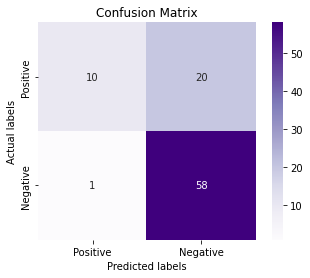

In [ ]:
#Printing the confusion matrix of our prediction
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

ax=plt.subplot()
predict_results = mnb.predict(test_vectors)
predict_results = (predict_results > 0.5) #.astype(int)

cm= confusion_matrix(y_test,predict_results)

sns.heatmap(cm, square=True, annot=True,fmt='d', cbar=True, ax= ax, cmap=plt.cm.Purples);

ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Positive','Negative']);ax.yaxis.set_ticklabels(['Positive','Negative'])

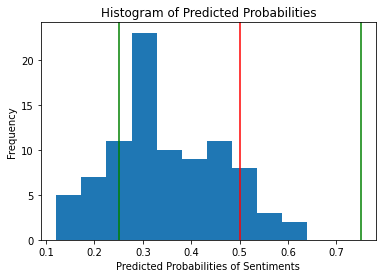

In [ ]:
#store the predicted probabilities of class membership
y_pred_prob = mnb.predict_proba(test_vectors)[:,0] #estimated probabilities or confidence score of each word
plt.hist(y_pred_prob)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probabilities of Sentiments')
plt.ylabel('Frequency')
_=plt.axvline(x=0.5,color ='red')
_=plt.axvline(x=0.75,color ='green')
_=plt.axvline(x=0.25,color ='green')
#print(test_vectors)# the vector of each word
#test_vectors.shape
#y_predict=[int (p[1]>0.5) for p in mnb.predict_proba(test_vectors)]
#y_predict[-10:]
#y_test[-10:]

In [ ]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange', label='ROC')
    plt.plot([0,1],color='darkblue', linestyle='dashed')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show

In [ ]:
# classifier performance
from sklearn.metrics import roc_auc_score,roc_curve
pc_auc=roc_auc_score(y_test,y_pred) *100
pc_auc

65.81920903954803